In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

## Pre-processing functions

In [3]:
def get_last_secs(_id, length=25):
    record = wfdb.rdrecord('training/'+_id) 
    Fs = record.fs
    N_d = record.sig_len
    N0_d = N_d-length*Fs+1
    return wfdb.rdrecord('training/'+_id, sampfrom = N0_d)

In [4]:
def get_signal(_ids):
    signals = []
    labels = []
    for _id in _ids:
        record = get_last_secs(_id, length=25)
        signals.append(record.p_signal)
        labels.append(id2label[_id])
    return signals, labels

## Load data from MIMIC II Waveform Database

In [18]:
rec = wfdb.rdrecord('a40001_000000', pn_dir='mimic2db/a40001')

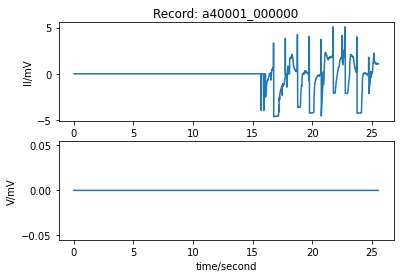

In [19]:
wfdb.plot_wfdb(record=rec, time_units='seconds')

In [7]:
rec.__dict__

{'record_name': 'a40001_000000',
 'n_sig': 2,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 3196,
 'base_time': datetime.time(20, 59, 38, 720000),
 'base_date': datetime.date(2014, 7, 19),
 'comments': ['a40001_000000 2 125 3196 20:59:38.720  19/07/2014',
  '-----',
  '1 samples removed from end',
  'a40001_000000 2 125 3197 20:59:38.720  19/07/2014',
  '-----'],
 'sig_name': ['II', 'V'],
 'p_signal': array([[0.  , 0.  ],
        [0.  , 0.  ],
        [0.  , 0.  ],
        ...,
        [1.04, 0.  ],
        [1.08, 0.  ],
        [1.08, 0.  ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a40001_000000.dat', 'a40001_000000.dat'],
 'fmt': ['80', '80'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [25.0, 31.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [8, 8],
 'adc_zero': [0, 0],
 'init_value': [0, 0],
 'checksum': [4064, 0],
 'block_size': [0, 0],
 'base_datetime': da

In [ ]:
rec = wfdb.rdann('a40001_000000', 'alM', pn_dir='mimic2db/a40001')

## Load data from PhysioNet Challenge

In [2]:
id2type, id2label, VT2label, VT_ids= {}, {}, {}, set() ##initializing empty dictionaries to fill with samples id, types, and values

with open('training/ALARMS', 'r') as f:
    for line in f.readlines():
        _id, _type, label= line.split(',')
        label = int(label[0])
        
        id2type[_id]= _type
        id2label[_id]= label
        if _type == 'Ventricular_Tachycardia':
            VT2label[_id]= label
            VT_ids.add(_id)

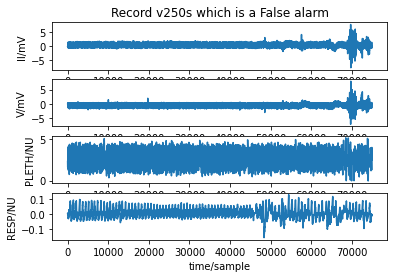

In [5]:
# Plot the signals, and show the data.
_id='v250s'
record = wfdb.rdrecord('training/'+_id) 
wfdb.plot_wfdb(record=record, title='Record '+_id+' which is a '+ record.comments[1]) 

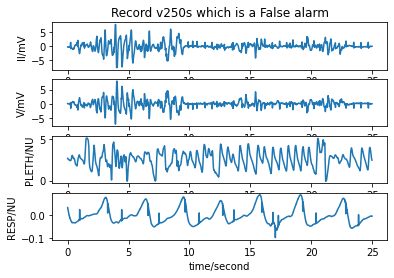

In [6]:
# Plot the signals, and show the data.
_id='v250s'
record = get_last_secs(_id) 
wfdb.plot_wfdb(record=record, title='Record '+_id+' which is a '+ record.comments[1], time_units='seconds')

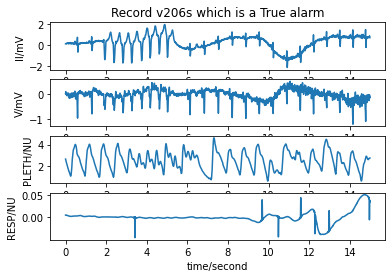

In [7]:
# Plot the signals, and show the data.
_id='v206s'
record = get_last_secs(_id, length=15) 
wfdb.plot_wfdb(record=record, title='Record '+_id+' which is a '+ record.comments[1], time_units='seconds')

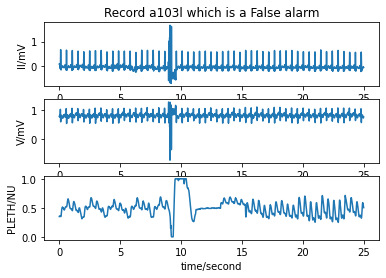

In [8]:
# Plot the signals, and show the data.
_id='a103l'
record = get_last_secs(_id, length=25) 
wfdb.plot_wfdb(record=record, title='Record '+_id+' which is a '+ record.comments[1], time_units='seconds')

In [9]:
#example for loading without wfdb
import scipy.io
record_from_mat = scipy.io.loadmat('training/v206s.mat')

In [10]:
record.__dict__

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 6249,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[ 0.0964537 ,  0.78840304,  0.34924182],
        [ 0.09452187,  0.78165399,  0.34892259],
        [ 0.09327998,  0.77728137,  0.34780527],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [699, 8294, 4376],
 'checksum': [2410, 47795, 21793],


# Basic Machine Learning Module

In [ ]:
signals, labels= get_signal(VT_ids)

In [ ]:
signals_selected= []
labels_selected= []
for i in range(len(signals)):
    if (signals[i]).shape == (6249, 4):
        signals_selected.append(signals[i])
        labels_selected.append(labels[i])

In [ ]:
num_x = len(signals_selected)
num_train = int(num_x*0.7)

In [ ]:
train_x, train_y, test_x, test_y = np.array(signals_selected[:num_train]), np.array(labels_selected[:num_train]), np.array(signals_selected[num_train:]), np.array(labels_selected[num_train:])

In [ ]:
train_x.shape

In [ ]:
train_y, test_y = train_y.reshape((-1, 1)), test_y.reshape((-1, 1))

In [ ]:
np.unique(train_x)

In [ ]:
from sklearn.neural_network import MLPClassifier
train_x= train_x.reshape(184,-1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(100, 2), random_state=1)

clf.fit(train_x, train_y)

In [ ]:
f_train_x= train_x.reshape(184,-1)

In [ ]:
f_train_x.shape

In [ ]:
import torch.nn as nn

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # kernel
        self.conv1 = nn.Conv1d(4, 8, 9, stride= 5) #out is (6249-9)/5+1= 1249
        self.maxpool = nn.MaxPool1d(kernel_size=9,stride=2) #out1 is (1249-9)/2 +1= 621 
        self.conv2 = nn.Conv1d(8, 16, 4, stride = 3) #out2 is (1249-4)/3 +1= 416 
        #maxpool out3 is 204
        self.dense1 = nn.Linear(204 * 16, 1000) 
        self.dense2 = nn.Linear(1000, 32) 
        
        self.dense_final = nn.Linear(32, 2)
        self.sig = nn.LogSoftmax(dim=1)
        
        self.drop = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.maxpool(x)
        
        x = x.view(-1, 204 * 16)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense_final(x)
        x = x.softmax(x)

In [ ]:
import torch
x, y = torch.tensor(train_x.reshape(184,-1), dtype=float), torch.tensor(train_y)
x= x.float()

In [ ]:
from torch import optim

model = nn.Sequential(nn.Linear(24996, 5000),
                      nn.ReLU(),
                      nn.Linear(5000, 500),
                      nn.ReLU(),
                      nn.Linear(500, 1),
                      nn.Sigmoid())

criterion = nn.CrossEntropy()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 5
for e in range(epochs):
    running_loss = 0

    optimizer.zero_grad()
        
    output = model(x)
    print(output)
    
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
        
    running_loss += loss.item()
    
    print(f"Training loss: {running_loss}")

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # kernel
        self.conv1 = nn.Conv1d(4, 8, 5) #out is 6249-5+1= 6243
        self.maxpool = nn.MaxPool1d(kernel_size=5,stride=2) #out1 is (6243-5)/2 +1= 3120 
        self.conv2 = nn.Conv1d(8, 16, 5) #out2 is (3120-5)/2 +1= 1558 
        #out3 is 777
        self.conv3 = nn.Conv1d(8, 16, 5)
        self.fc1 = nn.Linear(777 * 16, 32) 
        self.dense2 = nn.Linear(32, 32) 
        
        self.dense_final = nn.Linear(32, num_classes)

    def forward(self, x):
        
        x = x.view(-1)
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        ##This is long for a small dataset

